In [1]:
import h5py
import numpy as np
import os
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
# Record the mass of dm and gas of the subhalo

models = [model for model in os.listdir('./') if (model[2] == '_')]

record_name = np.zeros( len(models) )
record_set = np.zeros( (len(models), 4) )

for j, dir in enumerate(models):

    name = dir.split('_')[1][7:]
    # jump the directory which has been skipped
    if dir[-1] != 'a':
        continue
    
    files = [file for file in os.listdir('./'+dir) if file.endswith('.hdf5')]
    
    find = 0
    if 'gas_merge.hdf5' in files:
        f = h5py.File( dir + '/gas_merge.hdf5' )
        find = 1
    elif 'TNG_modified.hdf5' in files:
        f = h5py.File( dir + '/TNG_modified.hdf5' )
        find = 1
    else:
        for file_i in files:
            if 'modified' in file_i:
                f = h5py.File( dir + '/' + file_i )
                find = 1
                break
        if find == 0:
            print("Error! no hdf5 file in the directory")
            print(name)
    
    # Record the mass of dm and gas of the subhalo
    if find == 0:
        continue
    
    record_name[j] = int(name)

    gas_mass = np.sum( f['PartType0']['Masses'][:] ) * 1e10
    dm_mass = np.sum( f['PartType1']['Masses'][:] ) * 1e10
    
    gas_coord = f['PartType0']['Coordinates'][:]
    dm_coord = f['PartType1']['Coordinates'][:]

    scale_factor        = f['Header'].attrs['Time']
    unit_length_cgs     = f['Header'].attrs['UnitLength_In_CGS']
    unit_mass_cgs       = f['Header'].attrs['UnitMass_In_CGS']
    unit_vel_cgs        = f['Header'].attrs['UnitVelocity_In_CGS']

    # Find the coordinate range of the particles
    min_set = np.zeros(3)
    max_set = np.zeros(3)

    for i in range(3):
        min_set[i] = min( np.min(gas_coord[:,i]), np.min(dm_coord[:,i]) )
        max_set[i] = max( np.max(gas_coord[:,i]), np.max(dm_coord[:,i]) )

    range_len = np.max(max_set - min_set)
    
    record_set[j, 0] = np.log10(gas_mass)
    record_set[j, 1] = np.log10(dm_mass)
    record_set[j, 2] = range_len
    # calculate mean density of the gas
    total_mass = (gas_mass + dm_mass) * unit_mass_cgs / 1e10
    range_len *= unit_length_cgs * scale_factor
    matter_density = total_mass / (4/3*np.pi*(range_len/2)**3)

    record_set[j, 3] = np.log10(matter_density)

In [4]:
f = open('record_mass_2.csv', 'w')

# write the file according to the rank of the mass
sort_idx = np.argsort(record_set[:,1])

f.write('ID,Gas Mass,DM Mass,Range Length,Matter Density' + '\n')
for ind in sort_idx:
    if record_name[ind] != 0:
        f.write( '%s & %.2f & %.2f & %.2f & %.2f \\\\' % (str(int(record_name[ind])), record_set[ind, 0], record_set[ind, 1], record_set[ind, 2], record_set[ind, 3]) + '\n' )
        # f.write( '%s,%.2f,%.2f,%.2f,%.2f' % (str(int(record_name[ind])), record_set[ind, 0], record_set[ind, 1], record_set[ind, 2], record_set[ind, 3]) + '\n' )

f.close()

In [10]:
# Run the k spectrum script in every valid model directory
models = [model for model in os.listdir('./') if (model[2] == '_')]

# multiprocessing
import multiprocessing

def run_script(dir):
    # jump the directory which has been skipped
    if dir[-1] != 'a':
        return
    
    dir_output = dir + '/output/'

    # copy the script to the directory
    os.system('cp k_spectrum.py ' + dir_output)
    # execute the script
    os.system('cd ' + dir_output + ' && rm spectrum_*.txt && python3 k_spectrum.py')
    # os.system('cd ' + dir_output + ' && python3 k_spectrum.py')

    # return back to the current directory
    os.system('cd ../../')

pool = multiprocessing.Pool(processes=4)
pool.map(run_script, models)
pool.close()
pool.join()

Center of Mass:  [-3.44347578 -2.73828121  0.11922308]
Center of Mass:  [-0.09775338 -0.88377348  0.48537756]
Center of Mass:  [-0.11392999  0.13171496 -0.84965993]
Search radius: 108.723 pc
Search radius: 108.723 pc
Search radius: 108.723 pc
Center of Mass:  [-0.40800986  0.90915904 -0.73804535]
Box_length: 2319 pc
Box_length: 2319 pc
Box_length: 2319 pc
Search radius: 108.723 pc


yt : [INFO     ] 2024-07-25 00:09:36,441 Omega Lambda is 0.0, so we are turning off Cosmology.
yt : [INFO     ] 2024-07-25 00:09:36,454 Omega Lambda is 0.0, so we are turning off Cosmology.
yt : [INFO     ] 2024-07-25 00:09:36,474 Omega Lambda is 0.0, so we are turning off Cosmology.
yt : [INFO     ] 2024-07-25 00:09:36,491 Parameters: current_time              = 0.049009036794660774
yt : [INFO     ] 2024-07-25 00:09:36,492 Parameters: domain_dimensions         = [1 1 1]
yt : [INFO     ] 2024-07-25 00:09:36,492 Parameters: domain_left_edge          = [-35.44347578 -34.73828121 -31.88077692]
yt : [INFO     ] 2024-07-25 00:09:36,493 Parameters: domain_right_edge         = [28.55652422 29.26171879 32.11922308]
yt : [INFO     ] 2024-07-25 00:09:36,493 Parameters: cosmological_simulation   = 0
yt : [WARNING  ] 2024-07-25 00:09:36,493 A bounding box was explicitly specified, so we are disabling periodicity.
yt : [INFO     ] 2024-07-25 00:09:36,503 Parameters: current_time              = 0.04

Box_length: 2319 pc


yt : [INFO     ] 2024-07-25 00:09:36,879 Omega Lambda is 0.0, so we are turning off Cosmology.
Initializing coarse index :  68%|██████▊   | 15/22 [00:00<00:00, 39.48it/s]yt : [INFO     ] 2024-07-25 00:09:36,926 Parameters: current_time              = 0.049009036794660774
yt : [INFO     ] 2024-07-25 00:09:36,927 Parameters: domain_dimensions         = [1 1 1]
yt : [INFO     ] 2024-07-25 00:09:36,927 Parameters: domain_left_edge          = [-32.40800986 -31.09084096 -32.73804535]
yt : [INFO     ] 2024-07-25 00:09:36,927 Parameters: domain_right_edge         = [31.59199014 32.90915904 31.26195465]
yt : [INFO     ] 2024-07-25 00:09:36,927 Parameters: cosmological_simulation   = 0
yt : [WARNING  ] 2024-07-25 00:09:36,927 A bounding box was explicitly specified, so we are disabling periodicity.
Initializing coarse index : 100%|██████████| 25/25 [00:00<00:00, 36.60it/s]
yt : [INFO     ] 2024-07-25 00:09:37,246 Updating index_order2 from 2 to 2
Initializing coarse index : 100%|██████████| 26/2

Box_length: 579 pc


Interpolating SPH field ('PartType0', 'particle_velocity_z'): 16300000it [00:11, 1610277.94it/s]yt : [INFO     ] 2024-07-25 00:11:15,799 Omega Lambda is 0.0, so we are turning off Cosmology.
yt : [INFO     ] 2024-07-25 00:11:15,852 Parameters: current_time              = 0.049009036794660774
yt : [INFO     ] 2024-07-25 00:11:15,852 Parameters: domain_dimensions         = [1 1 1]
yt : [INFO     ] 2024-07-25 00:11:15,854 Parameters: domain_left_edge          = [-8.11392999 -7.86828504 -8.84965993]
yt : [INFO     ] 2024-07-25 00:11:15,854 Parameters: domain_right_edge         = [7.88607001 8.13171496 7.15034007]
yt : [INFO     ] 2024-07-25 00:11:15,855 Parameters: cosmological_simulation   = 0
yt : [WARNING  ] 2024-07-25 00:11:15,855 A bounding box was explicitly specified, so we are disabling periodicity.
yt : [INFO     ] 2024-07-25 00:11:15,896 Allocating for 6.693e+06 particles
Initializing coarse index : 100%|██████████| 25/25 [00:00<00:00, 32.66it/s]0:11, 1185168.20it/s]
yt : [INFO  

Box_length: 579 pc


yt : [INFO     ] 2024-07-25 00:11:31,919 Allocating for 6.955e+06 particles
Initializing coarse index : 100%|██████████| 26/26 [00:00<00:00, 34.55it/s]91it/s]
yt : [INFO     ] 2024-07-25 00:11:32,684 Updating index_order2 from 2 to 2
Initializing refined index:  88%|████████▊ | 23/26 [00:03<00:00,  7.35it/s]yt : [INFO     ] 2024-07-25 00:11:35,753 Omega Lambda is 0.0, so we are turning off Cosmology.


Box_length: 579 pc


yt : [INFO     ] 2024-07-25 00:11:35,792 Parameters: current_time              = 0.049009036794660774
yt : [INFO     ] 2024-07-25 00:11:35,792 Parameters: domain_dimensions         = [1 1 1]
yt : [INFO     ] 2024-07-25 00:11:35,793 Parameters: domain_left_edge          = [-11.44347578 -10.73828121  -7.88077692]
yt : [INFO     ] 2024-07-25 00:11:35,793 Parameters: domain_right_edge         = [4.55652422 5.26171879 8.11922308]
yt : [INFO     ] 2024-07-25 00:11:35,793 Parameters: cosmological_simulation   = 0
yt : [WARNING  ] 2024-07-25 00:11:35,793 A bounding box was explicitly specified, so we are disabling periodicity.
yt : [INFO     ] 2024-07-25 00:11:35,826 Allocating for 5.915e+06 particles
Initializing coarse index : 100%|██████████| 22/22 [00:00<00:00, 38.49it/s]68it/s]
yt : [INFO     ] 2024-07-25 00:11:36,408 Updating index_order2 from 2 to 2
Initializing refined index: 100%|██████████| 22/22 [00:02<00:00,  8.26it/s]15it/s]


Box_length: 579 pc


yt : [INFO     ] 2024-07-25 00:11:39,364 Omega Lambda is 0.0, so we are turning off Cosmology.
yt : [INFO     ] 2024-07-25 00:11:39,403 Parameters: current_time              = 0.049009036794660774
yt : [INFO     ] 2024-07-25 00:11:39,403 Parameters: domain_dimensions         = [1 1 1]
yt : [INFO     ] 2024-07-25 00:11:39,403 Parameters: domain_left_edge          = [-8.40800986 -7.09084096 -8.73804535]
yt : [INFO     ] 2024-07-25 00:11:39,404 Parameters: domain_right_edge         = [7.59199014 8.90915904 7.26195465]
yt : [INFO     ] 2024-07-25 00:11:39,404 Parameters: cosmological_simulation   = 0
yt : [WARNING  ] 2024-07-25 00:11:39,404 A bounding box was explicitly specified, so we are disabling periodicity.
yt : [INFO     ] 2024-07-25 00:11:39,449 Allocating for 8.798e+06 particles
Initializing coarse index : 100%|██████████| 33/33 [00:00<00:00, 34.24it/s]8it/s] 
yt : [INFO     ] 2024-07-25 00:11:40,430 Updating index_order2 from 2 to 2
Initializing refined index: 100%|██████████| 33

Center of Mass:  [-0.76154899 -0.02432779  1.4253845 ]
Search radius: 108.723 pc


Interpolating SPH field ('PartType0', 'Density'): 12200000it [01:27, 59162.54it/s] 998.03it/s]

Box_length: 2319 pc


yt : [INFO     ] 2024-07-25 00:20:36,933 Omega Lambda is 0.0, so we are turning off Cosmology.
yt : [INFO     ] 2024-07-25 00:20:36,978 Parameters: current_time              = 0.049009036794660774
yt : [INFO     ] 2024-07-25 00:20:36,978 Parameters: domain_dimensions         = [1 1 1]
yt : [INFO     ] 2024-07-25 00:20:36,978 Parameters: domain_left_edge          = [-32.76154899 -32.02432779 -30.5746155 ]
yt : [INFO     ] 2024-07-25 00:20:36,979 Parameters: domain_right_edge         = [31.23845101 31.97567221 33.4253845 ]
yt : [INFO     ] 2024-07-25 00:20:36,979 Parameters: cosmological_simulation   = 0
yt : [WARNING  ] 2024-07-25 00:20:36,979 A bounding box was explicitly specified, so we are disabling periodicity.
yt : [INFO     ] 2024-07-25 00:20:37,030 Allocating for 8.257e+06 particles
Initializing coarse index : 100%|██████████| 31/31 [00:00<00:00, 47.79it/s]:30, 116776.73it/s]]
yt : [INFO     ] 2024-07-25 00:20:37,690 Updating index_order2 from 2 to 2
Initializing refined index: 

Box_length: 579 pc


yt : [INFO     ] 2024-07-25 00:22:05,567 Allocating for 8.257e+06 particles
Initializing coarse index : 100%|██████████| 31/31 [00:00<00:00, 33.27it/s]6it/s] 8899.52it/s]
yt : [INFO     ] 2024-07-25 00:22:06,515 Updating index_order2 from 2 to 2
Initializing refined index: 100%|██████████| 31/31 [00:04<00:00,  7.35it/s]:09, 220081.47it/s]
Interpolating SPH field ('PartType0', 'particle_velocity_z'): 14900000it [01:51, 133041.58it/s]
Interpolating SPH field ('PartType0', 'Density'): 13650000it [02:05, 104265.03it/s]

Center of Mass:  [-0.46942322 -1.37124055 -1.52085893]
Search radius: 108.723 pc


Interpolating SPH field ('PartType0', 'Density'): 10400000it [01:35, 134461.46it/s]yt : [INFO     ] 2024-07-25 00:23:15,253 Omega Lambda is 0.0, so we are turning off Cosmology.
yt : [INFO     ] 2024-07-25 00:23:15,299 Parameters: current_time              = 0.049009036794660774
yt : [INFO     ] 2024-07-25 00:23:15,300 Parameters: domain_dimensions         = [1 1 1]
yt : [INFO     ] 2024-07-25 00:23:15,300 Parameters: domain_left_edge          = [-32.46942322 -33.37124055 -33.52085893]
yt : [INFO     ] 2024-07-25 00:23:15,300 Parameters: domain_right_edge         = [31.53057678 30.62875945 30.47914107]
yt : [INFO     ] 2024-07-25 00:23:15,300 Parameters: cosmological_simulation   = 0
yt : [WARNING  ] 2024-07-25 00:23:15,300 A bounding box was explicitly specified, so we are disabling periodicity.
Interpolating SPH field ('PartType0', 'Density'): 10500000it [01:35, 184925.89it/s]

Box_length: 2319 pc


yt : [INFO     ] 2024-07-25 00:23:15,352 Allocating for 7.225e+06 particles
Initializing coarse index : 100%|██████████| 27/27 [00:00<00:00, 40.23it/s]96it/s] 
yt : [INFO     ] 2024-07-25 00:23:16,033 Updating index_order2 from 2 to 2
Initializing refined index: 100%|██████████| 27/27 [00:02<00:00,  9.39it/s]37it/s]]
Interpolating SPH field ('PartType0', 'Density'): 16200000it [00:08, 1973565.27it/s]
Interpolating SPH field ('PartType0', 'Density'): 15300000it [02:18, 110213.59it/s]712.78it/s]
Interpolating SPH field ('PartType0', 'particle_velocity_x'): 16200000it [00:08, 1989178.53it/s]
Interpolating SPH field ('PartType0', 'Density'): 16200000it [00:07, 2043896.76it/s]08.43it/s]
Interpolating SPH field ('PartType0', 'particle_velocity_y'): 16200000it [00:07, 2063766.37it/s]
Interpolating SPH field ('PartType0', 'Density'): 18100000it [02:23, 125909.79it/s]53.87it/s] 
Interpolating SPH field ('PartType0', 'Density'): 16200000it [00:07, 2103801.05it/s]17.07it/s]
Interpolating SPH fiel

Box_length: 579 pc


Initializing coarse index : 100%|██████████| 27/27 [00:00<00:00, 40.74it/s]:30, 72841.22it/s]
yt : [INFO     ] 2024-07-25 00:24:35,040 Updating index_order2 from 2 to 2
Initializing refined index: 100%|██████████| 27/27 [00:04<00:00,  6.69it/s]:06, 197822.39it/s]
Interpolating SPH field ('PartType0', 'particle_velocity_z'): 15300000it [02:21, 108262.32it/s]
Interpolating SPH field ('PartType0', 'particle_velocity_x'): 13150000it [01:40, 263332.73it/s]

Center of Mass:  [-1.5921798  -0.93845103  0.33179707]
Search radius: 108.723 pc


Interpolating SPH field ('PartType0', 'particle_velocity_x'): 13300000it [01:40, 274322.37it/s]yt : [INFO     ] 2024-07-25 00:26:13,467 Omega Lambda is 0.0, so we are turning off Cosmology.
Interpolating SPH field ('PartType0', 'Density'): 11200000it [01:33, 61376.47it/s] 

Box_length: 2319 pc


yt : [INFO     ] 2024-07-25 00:26:13,513 Parameters: current_time              = 0.049009036794660774
yt : [INFO     ] 2024-07-25 00:26:13,513 Parameters: domain_dimensions         = [1 1 1]
yt : [INFO     ] 2024-07-25 00:26:13,514 Parameters: domain_left_edge          = [-33.5921798  -32.93845103 -31.66820293]
yt : [INFO     ] 2024-07-25 00:26:13,514 Parameters: domain_right_edge         = [30.4078202  31.06154897 32.33179707]
yt : [INFO     ] 2024-07-25 00:26:13,514 Parameters: cosmological_simulation   = 0
yt : [WARNING  ] 2024-07-25 00:26:13,514 A bounding box was explicitly specified, so we are disabling periodicity.
yt : [INFO     ] 2024-07-25 00:26:13,565 Allocating for 7.750e+06 particles
Initializing coarse index : 100%|██████████| 29/29 [00:00<00:00, 38.84it/s].16it/s]077.03it/s]]
yt : [INFO     ] 2024-07-25 00:26:14,322 Updating index_order2 from 2 to 2
Initializing refined index: 100%|██████████| 29/29 [00:02<00:00,  9.76it/s]2:12, 68575.10it/s] 
Interpolating SPH field ('P

Center of Mass:  [-1.25431487  0.34616304 -0.8885113 ]
Search radius: 108.723 pc


Interpolating SPH field ('PartType0', 'particle_velocity_y'): 13700000it [00:06, 2969690.00it/s]yt : [INFO     ] 2024-07-25 00:26:53,884 Omega Lambda is 0.0, so we are turning off Cosmology.
yt : [INFO     ] 2024-07-25 00:26:53,929 Parameters: current_time              = 0.049009036794660774
yt : [INFO     ] 2024-07-25 00:26:53,930 Parameters: domain_dimensions         = [1 1 1]
yt : [INFO     ] 2024-07-25 00:26:53,930 Parameters: domain_left_edge          = [-33.25431487 -31.65383696 -32.8885113 ]
yt : [INFO     ] 2024-07-25 00:26:53,930 Parameters: domain_right_edge         = [30.74568513 32.34616304 31.1114887 ]
yt : [INFO     ] 2024-07-25 00:26:53,930 Parameters: cosmological_simulation   = 0
yt : [WARNING  ] 2024-07-25 00:26:53,930 A bounding box was explicitly specified, so we are disabling periodicity.
yt : [INFO     ] 2024-07-25 00:26:53,984 Allocating for 6.717e+06 particles
Initializing coarse index :   0%|          | 0/25 [00:00<?, ?it/s]

Box_length: 2319 pc


Initializing coarse index : 100%|██████████| 25/25 [00:00<00:00, 45.02it/s]:19, 125774.83it/s]s]
Interpolating SPH field ('PartType0', 'particle_velocity_y'): 15400000it [00:06, 2578585.28it/s]yt : [INFO     ] 2024-07-25 00:26:54,547 Updating index_order2 from 2 to 2
Interpolating SPH field ('PartType0', 'particle_velocity_y'): 17400000it [00:07, 2237058.06it/s]
Initializing refined index: 100%|██████████| 25/25 [00:02<00:00, 10.17it/s]:21, 113845.74it/s]
Interpolating SPH field ('PartType0', 'Density'): 15000000it [00:06, 2499044.70it/s]20.02it/s]
Interpolating SPH field ('PartType0', 'Density'): 17400000it [00:07, 2227935.94it/s]2933.33it/s]
Interpolating SPH field ('PartType0', 'particle_velocity_x'): 15000000it [00:06, 2247102.74it/s]
Interpolating SPH field ('PartType0', 'particle_velocity_z'): 17400000it [00:07, 2284043.11it/s]
Interpolating SPH field ('PartType0', 'Density'): 15000000it [00:06, 2410535.24it/s]14.89it/s]
Interpolating SPH field ('PartType0', 'particle_velocity_y'

Box_length: 579 pc


yt : [INFO     ] 2024-07-25 00:27:31,586 Omega Lambda is 0.0, so we are turning off Cosmology.
Interpolating SPH field ('PartType0', 'Density'): 4650000it [00:35, 130738.01it/s]yt : [INFO     ] 2024-07-25 00:27:31,625 Parameters: current_time              = 0.049009036794660774
yt : [INFO     ] 2024-07-25 00:27:31,625 Parameters: domain_dimensions         = [1 1 1]
yt : [INFO     ] 2024-07-25 00:27:31,625 Parameters: domain_left_edge          = [-9.5921798  -8.93845103 -7.66820293]
yt : [INFO     ] 2024-07-25 00:27:31,626 Parameters: domain_right_edge         = [6.4078202  7.06154897 8.33179707]
yt : [INFO     ] 2024-07-25 00:27:31,626 Parameters: cosmological_simulation   = 0
yt : [WARNING  ] 2024-07-25 00:27:31,626 A bounding box was explicitly specified, so we are disabling periodicity.
yt : [INFO     ] 2024-07-25 00:27:31,665 Allocating for 7.750e+06 particles
Initializing coarse index : 100%|██████████| 29/29 [00:00<00:00, 41.07it/s]:56, 224636.75it/s]
yt : [INFO     ] 2024-07-25 

Box_length: 579 pc


yt : [INFO     ] 2024-07-25 00:28:07,449 Omega Lambda is 0.0, so we are turning off Cosmology.
yt : [INFO     ] 2024-07-25 00:28:07,487 Parameters: current_time              = 0.049009036794660774
yt : [INFO     ] 2024-07-25 00:28:07,487 Parameters: domain_dimensions         = [1 1 1]
yt : [INFO     ] 2024-07-25 00:28:07,487 Parameters: domain_left_edge          = [-9.25431487 -7.65383696 -8.8885113 ]
yt : [INFO     ] 2024-07-25 00:28:07,488 Parameters: domain_right_edge         = [6.74568513 8.34616304 7.1114887 ]
yt : [INFO     ] 2024-07-25 00:28:07,488 Parameters: cosmological_simulation   = 0
yt : [WARNING  ] 2024-07-25 00:28:07,488 A bounding box was explicitly specified, so we are disabling periodicity.
yt : [INFO     ] 2024-07-25 00:28:07,523 Allocating for 6.717e+06 particles
Initializing coarse index : 100%|██████████| 25/25 [00:00<00:00, 39.57it/s]7it/s] 
yt : [INFO     ] 2024-07-25 00:28:08,166 Updating index_order2 from 2 to 2
Initializing refined index: 100%|██████████| 25

Center of Mass:  [-0.49884541  1.51719866  0.78006509]
Search radius: 108.723 pc
Box_length: 2319 pc


Interpolating SPH field ('PartType0', 'particle_velocity_z'): 13200000it [01:49, 62293.57it/s]yt : [INFO     ] 2024-07-25 00:36:26,397 Omega Lambda is 0.0, so we are turning off Cosmology.
yt : [INFO     ] 2024-07-25 00:36:26,443 Parameters: current_time              = 0.049009036794660774
yt : [INFO     ] 2024-07-25 00:36:26,443 Parameters: domain_dimensions         = [1 1 1]
yt : [INFO     ] 2024-07-25 00:36:26,443 Parameters: domain_left_edge          = [-32.49884541 -30.48280134 -31.21993491]
yt : [INFO     ] 2024-07-25 00:36:26,443 Parameters: domain_right_edge         = [31.50115459 33.51719866 32.78006509]
yt : [INFO     ] 2024-07-25 00:36:26,444 Parameters: cosmological_simulation   = 0
yt : [WARNING  ] 2024-07-25 00:36:26,444 A bounding box was explicitly specified, so we are disabling periodicity.
Interpolating SPH field ('PartType0', 'particle_velocity_z'): 8700000it [00:55, 145573.15it/s]yt : [INFO     ] 2024-07-25 00:36:26,493 Allocating for 6.955e+06 particles
Initializin

Center of Mass:  [ 1.30954298 -0.28430941 -0.29583857]
Search radius: 108.723 pc


Interpolating SPH field ('PartType0', 'Density'): 7450000it [00:04, 1755526.11it/s]yt : [INFO     ] 2024-07-25 00:36:56,038 Omega Lambda is 0.0, so we are turning off Cosmology.


Box_length: 2319 pc


yt : [INFO     ] 2024-07-25 00:36:56,086 Parameters: current_time              = 0.049009036794660774
yt : [INFO     ] 2024-07-25 00:36:56,086 Parameters: domain_dimensions         = [1 1 1]
yt : [INFO     ] 2024-07-25 00:36:56,086 Parameters: domain_left_edge          = [-30.69045702 -32.28430941 -32.29583857]
yt : [INFO     ] 2024-07-25 00:36:56,087 Parameters: domain_right_edge         = [33.30954298 31.71569059 31.70416143]
yt : [INFO     ] 2024-07-25 00:36:56,087 Parameters: cosmological_simulation   = 0
yt : [WARNING  ] 2024-07-25 00:36:56,087 A bounding box was explicitly specified, so we are disabling periodicity.
Interpolating SPH field ('PartType0', 'Density'): 7750000it [00:04, 1916681.61it/s]yt : [INFO     ] 2024-07-25 00:36:56,136 Allocating for 7.496e+06 particles
Initializing coarse index : 100%|██████████| 28/28 [00:00<00:00, 41.00it/s].49it/s]
yt : [INFO     ] 2024-07-25 00:36:56,829 Updating index_order2 from 2 to 2
Interpolating SPH field ('PartType0', 'Density'): 15

Center of Mass:  [-0.69164187  0.53604998  1.9325883 ]


Interpolating SPH field ('PartType0', 'Density'): 14050000it [00:06, 2241231.80it/s]

Search radius: 108.723 pc


Interpolating SPH field ('PartType0', 'Density'): 15200000it [00:07, 2198681.66it/s]

Box_length: 2319 pc


Interpolating SPH field ('PartType0', 'Density'): 15550000it [00:07, 2420448.43it/s]yt : [INFO     ] 2024-07-25 00:37:20,272 Omega Lambda is 0.0, so we are turning off Cosmology.
yt : [INFO     ] 2024-07-25 00:37:20,318 Parameters: current_time              = 0.049009036794660774
yt : [INFO     ] 2024-07-25 00:37:20,318 Parameters: domain_dimensions         = [1 1 1]
yt : [INFO     ] 2024-07-25 00:37:20,319 Parameters: domain_left_edge          = [-32.69164187 -31.46395002 -30.0674117 ]
yt : [INFO     ] 2024-07-25 00:37:20,319 Parameters: domain_right_edge         = [31.30835813 32.53604998 33.9325883 ]
yt : [INFO     ] 2024-07-25 00:37:20,319 Parameters: cosmological_simulation   = 0
yt : [WARNING  ] 2024-07-25 00:37:20,319 A bounding box was explicitly specified, so we are disabling periodicity.
Interpolating SPH field ('PartType0', 'Density'): 15600000it [00:07, 2126400.92it/s]
yt : [INFO     ] 2024-07-25 00:37:20,383 Allocating for 1.633e+07 particles
Initializing coarse index : 10

Box_length: 579 pc


yt : [INFO     ] 2024-07-25 00:37:43,274 Omega Lambda is 0.0, so we are turning off Cosmology.
Interpolating SPH field ('PartType0', 'particle_velocity_z'): 9800000it [01:14, 174653.79it/s]yt : [INFO     ] 2024-07-25 00:37:43,311 Parameters: current_time              = 0.049009036794660774
yt : [INFO     ] 2024-07-25 00:37:43,312 Parameters: domain_dimensions         = [1 1 1]
yt : [INFO     ] 2024-07-25 00:37:43,312 Parameters: domain_left_edge          = [-8.49884541 -6.48280134 -7.21993491]
yt : [INFO     ] 2024-07-25 00:37:43,312 Parameters: domain_right_edge         = [7.50115459 9.51719866 8.78006509]
yt : [INFO     ] 2024-07-25 00:37:43,312 Parameters: cosmological_simulation   = 0
yt : [WARNING  ] 2024-07-25 00:37:43,313 A bounding box was explicitly specified, so we are disabling periodicity.
yt : [INFO     ] 2024-07-25 00:37:43,346 Allocating for 6.955e+06 particles
Initializing coarse index : 100%|██████████| 26/26 [00:00<00:00, 39.64it/s]1.36it/s]29.78it/s]
yt : [INFO     ]

Box_length: 579 pc


yt : [INFO     ] 2024-07-25 00:38:24,172 Parameters: current_time              = 0.049009036794660774
yt : [INFO     ] 2024-07-25 00:38:24,172 Parameters: domain_dimensions         = [1 1 1]
yt : [INFO     ] 2024-07-25 00:38:24,172 Parameters: domain_left_edge          = [-6.69045702 -8.28430941 -8.29583857]
yt : [INFO     ] 2024-07-25 00:38:24,173 Parameters: domain_right_edge         = [9.30954298 7.71569059 7.70416143]
yt : [INFO     ] 2024-07-25 00:38:24,173 Parameters: cosmological_simulation   = 0
yt : [WARNING  ] 2024-07-25 00:38:24,174 A bounding box was explicitly specified, so we are disabling periodicity.
yt : [INFO     ] 2024-07-25 00:38:24,206 Allocating for 7.496e+06 particles
Initializing coarse index : 100%|██████████| 28/28 [00:00<00:00, 40.01it/s]00, 2528518.39it/s]
yt : [INFO     ] 2024-07-25 00:38:24,918 Updating index_order2 from 2 to 2
Initializing refined index: 100%|██████████| 28/28 [00:03<00:00,  7.23it/s]69it/s]13681.92it/s]
Interpolating SPH field ('PartType

Center of Mass:  [4.07881297 3.7818299  9.19138304]


Interpolating SPH field ('PartType0', 'particle_velocity_y'): 28850000it [00:13, 2162869.31it/s]

Search radius: 108.723 pc


Interpolating SPH field ('PartType0', 'particle_velocity_y'): 29400000it [00:13, 2241474.74it/s]yt : [INFO     ] 2024-07-25 00:38:38,264 Omega Lambda is 0.0, so we are turning off Cosmology.


Box_length: 2319 pc


yt : [INFO     ] 2024-07-25 00:38:38,312 Parameters: current_time              = 0.049009036794660774
yt : [INFO     ] 2024-07-25 00:38:38,312 Parameters: domain_dimensions         = [1 1 1]
yt : [INFO     ] 2024-07-25 00:38:38,312 Parameters: domain_left_edge          = [-27.92118703 -28.2181701  -22.80861696]
yt : [INFO     ] 2024-07-25 00:38:38,312 Parameters: domain_right_edge         = [36.07881297 35.7818299  41.19138304]
yt : [INFO     ] 2024-07-25 00:38:38,313 Parameters: cosmological_simulation   = 0
yt : [WARNING  ] 2024-07-25 00:38:38,313 A bounding box was explicitly specified, so we are disabling periodicity.
Interpolating SPH field ('PartType0', 'particle_velocity_y'): 29650000it [00:13, 1992548.94it/s]yt : [INFO     ] 2024-07-25 00:38:38,382 Allocating for 1.633e+07 particles
Initializing coarse index : 100%|██████████| 61/61 [00:01<00:00, 49.11it/s]8it/s] 701934.11it/s]
Interpolating SPH field ('PartType0', 'Density'): 650000it [00:10, 56819.55it/s]yt : [INFO     ] 2024

Box_length: 579 pc


yt : [INFO     ] 2024-07-25 00:39:38,522 Omega Lambda is 0.0, so we are turning off Cosmology.
yt : [INFO     ] 2024-07-25 00:39:38,561 Parameters: current_time              = 0.049009036794660774
yt : [INFO     ] 2024-07-25 00:39:38,561 Parameters: domain_dimensions         = [1 1 1]
yt : [INFO     ] 2024-07-25 00:39:38,562 Parameters: domain_left_edge          = [-8.69164187 -7.46395002 -6.0674117 ]
yt : [INFO     ] 2024-07-25 00:39:38,562 Parameters: domain_right_edge         = [7.30835813 8.53604998 9.9325883 ]
yt : [INFO     ] 2024-07-25 00:39:38,562 Parameters: cosmological_simulation   = 0
yt : [WARNING  ] 2024-07-25 00:39:38,562 A bounding box was explicitly specified, so we are disabling periodicity.
Interpolating SPH field ('PartType0', 'particle_velocity_y'): 6400000it [00:02, 2511002.94it/s]yt : [INFO     ] 2024-07-25 00:39:38,615 Allocating for 1.633e+07 particles
Initializing coarse index : 100%|██████████| 61/61 [00:01<00:00, 49.56it/s]:04, 1954059.15it/s]
yt : [INFO    

Box_length: 579 pc


Initializing coarse index : 100%|██████████| 61/61 [00:01<00:00, 58.23it/s]86it/s]699.19it/s]
yt : [INFO     ] 2024-07-25 00:40:42,396 Updating index_order2 from 2 to 2
Initializing refined index: 100%|██████████| 61/61 [00:05<00:00, 10.50it/s]:13, 250785.26it/s]
Interpolating SPH field ('PartType0', 'Density'): 23100000it [02:27, 156382.20it/s]9873.65it/s]
Interpolating SPH field ('PartType0', 'particle_velocity_x'): 15600000it [02:16, 114040.46it/s]
Interpolating SPH field ('PartType0', 'particle_velocity_x'): 16000000it [02:06, 126336.83it/s]
Interpolating SPH field ('PartType0', 'Density'): 35200000it [03:42, 158239.19it/s]5406.29it/s]
Interpolating SPH field ('PartType0', 'particle_velocity_x'): 23100000it [02:21, 163022.83it/s]
Interpolating SPH field ('PartType0', 'Density'): 15600000it [02:14, 115738.18it/s]72.33it/s] 
Interpolating SPH field ('PartType0', 'Density'): 16000000it [02:10, 122893.87it/s]59.52it/s] 
Interpolating SPH field ('PartType0', 'particle_velocity_y'): 1560

Center of Mass:  [-4.5650574  -2.73351712 -1.15821698]
Search radius: 108.723 pc
Box_length: 2319 pc


Interpolating SPH field ('PartType0', 'Density'): 21150000it [02:09, 479716.94it/s]yt : [INFO     ] 2024-07-25 00:51:55,835 Omega Lambda is 0.0, so we are turning off Cosmology.
yt : [INFO     ] 2024-07-25 00:51:55,881 Parameters: current_time              = 0.049009036794660774
yt : [INFO     ] 2024-07-25 00:51:55,881 Parameters: domain_dimensions         = [1 1 1]
yt : [INFO     ] 2024-07-25 00:51:55,882 Parameters: domain_left_edge          = [-36.5650574  -34.73351712 -33.15821698]
yt : [INFO     ] 2024-07-25 00:51:55,882 Parameters: domain_right_edge         = [27.4349426  29.26648288 30.84178302]
yt : [INFO     ] 2024-07-25 00:51:55,882 Parameters: cosmological_simulation   = 0
yt : [WARNING  ] 2024-07-25 00:51:55,882 A bounding box was explicitly specified, so we are disabling periodicity.
yt : [INFO     ] 2024-07-25 00:51:55,931 Allocating for 7.504e+06 particles
Initializing coarse index : 100%|██████████| 28/28 [00:00<00:00, 42.17it/s].66it/s]
yt : [INFO     ] 2024-07-25 00:5

Center of Mass:  [-2.35136525 11.72257385 -8.5144677 ]


Interpolating SPH field ('PartType0', 'particle_velocity_z'): 200000it [00:00, 537033.99it/s]

Search radius: 108.723 pc


Interpolating SPH field ('PartType0', 'Density'): 16800000it [00:09, 1732810.32it/s]
Interpolating SPH field ('PartType0', 'particle_velocity_z'): 300000it [00:00, 330642.81it/s]yt : [INFO     ] 2024-07-25 00:52:09,857 Omega Lambda is 0.0, so we are turning off Cosmology.
yt : [INFO     ] 2024-07-25 00:52:09,907 Parameters: current_time              = 0.049009036794660774
yt : [INFO     ] 2024-07-25 00:52:09,907 Parameters: domain_dimensions         = [1 1 1]
yt : [INFO     ] 2024-07-25 00:52:09,907 Parameters: domain_left_edge          = [-34.35136525 -20.27742615 -40.5144677 ]
yt : [INFO     ] 2024-07-25 00:52:09,908 Parameters: domain_right_edge         = [29.64863475 43.72257385 23.4855323 ]
yt : [INFO     ] 2024-07-25 00:52:09,908 Parameters: cosmological_simulation   = 0
yt : [WARNING  ] 2024-07-25 00:52:09,908 A bounding box was explicitly specified, so we are disabling periodicity.
Interpolating SPH field ('PartType0', 'particle_velocity_y'): 250000it [00:02, 76510.97it/s] 

Box_length: 2319 pc


Interpolating SPH field ('PartType0', 'particle_velocity_z'): 350000it [00:00, 343218.53it/s]yt : [INFO     ] 2024-07-25 00:52:09,982 Allocating for 1.905e+07 particles
Initializing coarse index : 100%|██████████| 71/71 [00:01<00:00, 46.68it/s]02, 230829.85it/s]s]
yt : [INFO     ] 2024-07-25 00:52:11,531 Updating index_order2 from 2 to 2
Initializing refined index: 100%|██████████| 71/71 [00:06<00:00, 10.84it/s]:09, 110078.13it/s]s]
Interpolating SPH field ('PartType0', 'particle_velocity_x'): 16800000it [00:10, 1670443.44it/s]
Interpolating SPH field ('PartType0', 'Density'): 16800000it [00:09, 1713664.66it/s]72.67it/s]
Interpolating SPH field ('PartType0', 'Density'): 42600000it [00:17, 2401623.64it/s]55.43it/s]
Interpolating SPH field ('PartType0', 'particle_velocity_y'): 16800000it [00:09, 1715286.33it/s]
Interpolating SPH field ('PartType0', 'particle_velocity_x'): 42600000it [00:18, 2330961.56it/s]
Interpolating SPH field ('PartType0', 'Density'): 16800000it [00:09, 1774498.26it/

Box_length: 579 pc


yt : [INFO     ] 2024-07-25 00:53:25,763 Omega Lambda is 0.0, so we are turning off Cosmology.
Interpolating SPH field ('PartType0', 'particle_velocity_y'): 11200000it [00:05, 2295169.76it/s]yt : [INFO     ] 2024-07-25 00:53:25,804 Parameters: current_time              = 0.049009036794660774
yt : [INFO     ] 2024-07-25 00:53:25,804 Parameters: domain_dimensions         = [1 1 1]
yt : [INFO     ] 2024-07-25 00:53:25,804 Parameters: domain_left_edge          = [-12.5650574  -10.73351712  -9.15821698]
yt : [INFO     ] 2024-07-25 00:53:25,805 Parameters: domain_right_edge         = [3.4349426  5.26648288 6.84178302]
yt : [INFO     ] 2024-07-25 00:53:25,805 Parameters: cosmological_simulation   = 0
yt : [WARNING  ] 2024-07-25 00:53:25,805 A bounding box was explicitly specified, so we are disabling periodicity.
yt : [INFO     ] 2024-07-25 00:53:25,837 Allocating for 7.504e+06 particles
Initializing coarse index : 100%|██████████| 28/28 [00:00<00:00, 46.67it/s]0:05, 2434168.61it/s]
Interpola

Box_length: 579 pc


yt : [INFO     ] 2024-07-25 00:54:42,728 Omega Lambda is 0.0, so we are turning off Cosmology.
yt : [INFO     ] 2024-07-25 00:54:42,768 Parameters: current_time              = 0.049009036794660774
yt : [INFO     ] 2024-07-25 00:54:42,769 Parameters: domain_dimensions         = [1 1 1]
yt : [INFO     ] 2024-07-25 00:54:42,769 Parameters: domain_left_edge          = [-10.35136525   3.72257385 -16.5144677 ]
yt : [INFO     ] 2024-07-25 00:54:42,769 Parameters: domain_right_edge         = [ 5.64863475 19.72257385 -0.5144677 ]
yt : [INFO     ] 2024-07-25 00:54:42,769 Parameters: cosmological_simulation   = 0
yt : [WARNING  ] 2024-07-25 00:54:42,769 A bounding box was explicitly specified, so we are disabling periodicity.
yt : [INFO     ] 2024-07-25 00:54:42,828 Allocating for 1.905e+07 particles
Initializing coarse index : 100%|██████████| 71/71 [00:01<00:00, 66.32it/s]90it/s]
yt : [INFO     ] 2024-07-25 00:54:43,926 Updating index_order2 from 2 to 2
Initializing refined index: 100%|████████

Center of Mass:  [-0.23069417  0.79596334  0.3165614 ]
Search radius: 108.723 pc


Interpolating SPH field ('PartType0', 'Density'): 9200000it [01:27, 62978.85it/s]418982.49it/s]

Box_length: 2319 pc


Interpolating SPH field ('PartType0', 'Density'): 750000it [00:07, 92236.48it/s] yt : [INFO     ] 2024-07-25 00:54:57,791 Omega Lambda is 0.0, so we are turning off Cosmology.
yt : [INFO     ] 2024-07-25 00:54:57,837 Parameters: current_time              = 0.049009036794660774
yt : [INFO     ] 2024-07-25 00:54:57,838 Parameters: domain_dimensions         = [1 1 1]
yt : [INFO     ] 2024-07-25 00:54:57,838 Parameters: domain_left_edge          = [-32.23069417 -31.20403666 -31.6834386 ]
yt : [INFO     ] 2024-07-25 00:54:57,838 Parameters: domain_right_edge         = [31.76930583 32.79596334 32.3165614 ]
yt : [INFO     ] 2024-07-25 00:54:57,838 Parameters: cosmological_simulation   = 0
yt : [WARNING  ] 2024-07-25 00:54:57,838 A bounding box was explicitly specified, so we are disabling periodicity.
Interpolating SPH field ('PartType0', 'particle_velocity_y'): 27100000it [02:50, 387132.32it/s]yt : [INFO     ] 2024-07-25 00:54:57,889 Allocating for 7.758e+06 particles
Initializing coarse ind

Box_length: 579 pc


Initializing coarse index : 100%|██████████| 29/29 [00:00<00:00, 38.96it/s].65it/s]549.45it/s]
yt : [INFO     ] 2024-07-25 00:56:20,950 Updating index_order2 from 2 to 2
Initializing refined index: 100%|██████████| 29/29 [00:03<00:00,  7.34it/s]:06, 202118.83it/s]
Interpolating SPH field ('PartType0', 'particle_velocity_x'): 11400000it [01:45, 108175.21it/s]
Interpolating SPH field ('PartType0', 'Density'): 27400000it [02:47, 163490.49it/s]
Interpolating SPH field ('PartType0', 'Density'): 17400000it [02:02, 141864.20it/s]009.66it/s]
Interpolating SPH field ('PartType0', 'Density'): 11400000it [01:45, 107714.44it/s]930.37it/s]]
Interpolating SPH field ('PartType0', 'Density'): 35200000it [03:43, 157474.72it/s]38.35it/s]s]
Interpolating SPH field ('PartType0', 'particle_velocity_x'): 27400000it [02:46, 165017.97it/s]
Interpolating SPH field ('PartType0', 'particle_velocity_x'): 17400000it [02:02, 141687.73it/s]
Interpolating SPH field ('PartType0', 'particle_velocity_y'): 11400000it [01

Center of Mass:  [-1.15132457 -0.47944313 -0.10195476]
Search radius: 108.723 pc
Box_length: 2319 pc


Interpolating SPH field ('PartType0', 'particle_velocity_z'): 7900000it [01:13, 120026.47it/s]yt : [INFO     ] 2024-07-25 01:03:51,860 Omega Lambda is 0.0, so we are turning off Cosmology.
yt : [INFO     ] 2024-07-25 01:03:51,915 Parameters: current_time              = 0.049009036794660774
yt : [INFO     ] 2024-07-25 01:03:51,915 Parameters: domain_dimensions         = [1 1 1]
yt : [INFO     ] 2024-07-25 01:03:51,915 Parameters: domain_left_edge          = [-33.15132457 -32.47944313 -32.10195476]
yt : [INFO     ] 2024-07-25 01:03:51,916 Parameters: domain_right_edge         = [30.84867543 31.52055687 31.89804524]
yt : [INFO     ] 2024-07-25 01:03:51,916 Parameters: cosmological_simulation   = 0
yt : [WARNING  ] 2024-07-25 01:03:51,916 A bounding box was explicitly specified, so we are disabling periodicity.
yt : [INFO     ] 2024-07-25 01:03:51,964 Allocating for 6.947e+06 particles
Initializing coarse index : 100%|██████████| 26/26 [00:00<00:00, 38.76it/s]:13, 171440.77it/s]
yt : [INFO

Center of Mass:  [ 1.88218304 -0.84686036  1.30254649]
Search radius: 108.723 pc


Interpolating SPH field ('PartType0', 'particle_velocity_y'): 12900000it [01:24, 53287.08it/s]yt : [INFO     ] 2024-07-25 01:04:46,885 Omega Lambda is 0.0, so we are turning off Cosmology.
yt : [INFO     ] 2024-07-25 01:04:46,935 Parameters: current_time              = 0.049009036794660774
yt : [INFO     ] 2024-07-25 01:04:46,936 Parameters: domain_dimensions         = [1 1 1]
yt : [INFO     ] 2024-07-25 01:04:46,936 Parameters: domain_left_edge          = [-30.11781696 -32.84686036 -30.69745351]
yt : [INFO     ] 2024-07-25 01:04:46,936 Parameters: domain_right_edge         = [33.88218304 31.15313964 33.30254649]
yt : [INFO     ] 2024-07-25 01:04:46,937 Parameters: cosmological_simulation   = 0
yt : [WARNING  ] 2024-07-25 01:04:46,937 A bounding box was explicitly specified, so we are disabling periodicity.
Interpolating SPH field ('PartType0', 'Density'): 11100000it [00:06, 1704760.56it/s]yt : [INFO     ] 2024-07-25 01:04:46,989 Allocating for 7.479e+06 particles
Initializing coarse i

Box_length: 2319 pc


Initializing coarse index : 100%|██████████| 28/28 [00:00<00:00, 42.60it/s]3.29it/s]078.08it/s]
yt : [INFO     ] 2024-07-25 01:04:47,656 Updating index_order2 from 2 to 2
Interpolating SPH field ('PartType0', 'particle_velocity_y'): 17400000it [02:03, 140949.68it/s]
Interpolating SPH field ('PartType0', 'Density'): 15600000it [00:08, 1894174.01it/s]
Initializing refined index: 100%|██████████| 28/28 [00:02<00:00,  9.81it/s]1:28, 86996.19it/s]]
Interpolating SPH field ('PartType0', 'particle_velocity_z'): 15600000it [00:07, 1972186.49it/s]
Interpolating SPH field ('PartType0', 'Density'): 16800000it [00:07, 2174334.47it/s]127.17it/s]
Interpolating SPH field ('PartType0', 'particle_velocity_x'): 16800000it [00:08, 2098262.89it/s]
Interpolating SPH field ('PartType0', 'Density'): 1500000it [00:13, 91720.65it/s] 44383.45it/s]

Box_length: 579 pc


Interpolating SPH field ('PartType0', 'Density'): 0it [00:00, ?it/s]yt : [INFO     ] 2024-07-25 01:05:12,683 Omega Lambda is 0.0, so we are turning off Cosmology.
yt : [INFO     ] 2024-07-25 01:05:12,720 Parameters: current_time              = 0.049009036794660774
yt : [INFO     ] 2024-07-25 01:05:12,720 Parameters: domain_dimensions         = [1 1 1]
yt : [INFO     ] 2024-07-25 01:05:12,721 Parameters: domain_left_edge          = [-9.15132457 -8.47944313 -8.10195476]
yt : [INFO     ] 2024-07-25 01:05:12,721 Parameters: domain_right_edge         = [6.84867543 7.52055687 7.89804524]
yt : [INFO     ] 2024-07-25 01:05:12,721 Parameters: cosmological_simulation   = 0
yt : [WARNING  ] 2024-07-25 01:05:12,721 A bounding box was explicitly specified, so we are disabling periodicity.
yt : [INFO     ] 2024-07-25 01:05:12,750 Allocating for 6.947e+06 particles
Initializing coarse index : 100%|██████████| 26/26 [00:00<00:00, 38.06it/s]86it/s]]672.92it/s] 
yt : [INFO     ] 2024-07-25 01:05:13,444 

Box_length: 579 pc


Initializing coarse index : 100%|██████████| 28/28 [00:00<00:00, 40.17it/s]2:44, 184758.75it/s]
yt : [INFO     ] 2024-07-25 01:06:06,097 Updating index_order2 from 2 to 2
Interpolating SPH field ('PartType0', 'particle_velocity_y'): 27400000it [02:45, 165295.50it/s]
Initializing refined index: 100%|██████████| 28/28 [00:03<00:00,  7.34it/s].48it/s]
Interpolating SPH field ('PartType0', 'Density'): 17400000it [02:03, 141021.05it/s]
Interpolating SPH field ('PartType0', 'Density'): 13500000it [01:51, 121276.95it/s]5.09it/s]
Interpolating SPH field ('PartType0', 'Density'): 16700000it [02:18, 120510.57it/s]6749.52it/s]
Interpolating SPH field ('PartType0', 'particle_velocity_x'): 13500000it [01:51, 121040.56it/s]
Interpolating SPH field ('PartType0', 'Density'): 27400000it [02:45, 165870.63it/s]6856.24it/s]
Interpolating SPH field ('PartType0', 'particle_velocity_z'): 17400000it [02:03, 140698.62it/s]
Interpolating SPH field ('PartType0', 'particle_velocity_x'): 7200000it [01:02, 120056.2

Center of Mass:  [ 0.68037788 -0.81703268  0.81336975]
Search radius: 108.723 pc


Interpolating SPH field ('PartType0', 'Density'): 2600000it [00:22, 104019.88it/s]yt : [INFO     ] 2024-07-25 01:09:32,214 Omega Lambda is 0.0, so we are turning off Cosmology.
Interpolating SPH field ('PartType0', 'particle_velocity_x'): 7300000it [01:02, 144118.69it/s]yt : [INFO     ] 2024-07-25 01:09:32,262 Parameters: current_time              = 0.049009036794660774
yt : [INFO     ] 2024-07-25 01:09:32,262 Parameters: domain_dimensions         = [1 1 1]


Box_length: 2319 pc


yt : [INFO     ] 2024-07-25 01:09:32,263 Parameters: domain_left_edge          = [-31.31962212 -32.81703268 -31.18663025]
yt : [INFO     ] 2024-07-25 01:09:32,263 Parameters: domain_right_edge         = [32.68037788 31.18296732 32.81336975]
yt : [INFO     ] 2024-07-25 01:09:32,263 Parameters: cosmological_simulation   = 0
yt : [WARNING  ] 2024-07-25 01:09:32,263 A bounding box was explicitly specified, so we are disabling periodicity.
yt : [INFO     ] 2024-07-25 01:09:32,348 Allocating for 7.225e+06 particles
Initializing coarse index : 100%|██████████| 27/27 [00:00<00:00, 42.61it/s]:29, 225819.40it/s]
yt : [INFO     ] 2024-07-25 01:09:32,990 Updating index_order2 from 2 to 2
Initializing refined index: 100%|██████████| 27/27 [00:02<00:00,  9.60it/s]:06, 102117.43it/s]
Interpolating SPH field ('PartType0', 'Density'): 16200000it [00:07, 2040941.94it/s]06.65it/s]
Interpolating SPH field ('PartType0', 'particle_velocity_x'): 16200000it [00:08, 2015911.15it/s]
Interpolating SPH field ('Pa

Box_length: 579 pc


yt : [INFO     ] 2024-07-25 01:10:57,160 Omega Lambda is 0.0, so we are turning off Cosmology.
Interpolating SPH field ('PartType0', 'Density'): 12850000it [01:47, 170758.19it/s]yt : [INFO     ] 2024-07-25 01:10:57,198 Parameters: current_time              = 0.049009036794660774
yt : [INFO     ] 2024-07-25 01:10:57,198 Parameters: domain_dimensions         = [1 1 1]
yt : [INFO     ] 2024-07-25 01:10:57,198 Parameters: domain_left_edge          = [-7.31962212 -8.81703268 -7.18663025]
yt : [INFO     ] 2024-07-25 01:10:57,199 Parameters: domain_right_edge         = [8.68037788 7.18296732 8.81336975]
yt : [INFO     ] 2024-07-25 01:10:57,199 Parameters: cosmological_simulation   = 0
yt : [WARNING  ] 2024-07-25 01:10:57,199 A bounding box was explicitly specified, so we are disabling periodicity.
yt : [INFO     ] 2024-07-25 01:10:57,232 Allocating for 7.225e+06 particles
Initializing coarse index : 100%|██████████| 27/27 [00:00<00:00, 37.69it/s]1:54, 241172.78it/s]
yt : [INFO     ] 2024-07-2

Center of Mass:  [-1.72131508 -1.62594842 -0.47258517]
Search radius: 108.723 pc


Interpolating SPH field ('PartType0', 'particle_velocity_y'): 8950000it [01:13, 269708.64it/s]

Box_length: 2319 pc


Interpolating SPH field ('PartType0', 'particle_velocity_y'): 9000000it [01:13, 267620.38it/s]yt : [INFO     ] 2024-07-25 01:12:15,354 Omega Lambda is 0.0, so we are turning off Cosmology.
yt : [INFO     ] 2024-07-25 01:12:15,399 Parameters: current_time              = 0.049009036794660774
yt : [INFO     ] 2024-07-25 01:12:15,399 Parameters: domain_dimensions         = [1 1 1]
yt : [INFO     ] 2024-07-25 01:12:15,400 Parameters: domain_left_edge          = [-33.72131508 -33.62594842 -32.47258517]
yt : [INFO     ] 2024-07-25 01:12:15,400 Parameters: domain_right_edge         = [30.27868492 30.37405158 31.52741483]
yt : [INFO     ] 2024-07-25 01:12:15,400 Parameters: cosmological_simulation   = 0
yt : [WARNING  ] 2024-07-25 01:12:15,400 A bounding box was explicitly specified, so we are disabling periodicity.
yt : [INFO     ] 2024-07-25 01:12:15,453 Allocating for 7.233e+06 particles
Initializing coarse index : 100%|██████████| 27/27 [00:00<00:00, 39.64it/s]7it/s] 8706.58it/s]
yt : [INFO

Box_length: 579 pc


yt : [INFO     ] 2024-07-25 01:13:39,629 Parameters: current_time              = 0.049009036794660774
yt : [INFO     ] 2024-07-25 01:13:39,630 Parameters: domain_dimensions         = [1 1 1]
yt : [INFO     ] 2024-07-25 01:13:39,630 Parameters: domain_left_edge          = [-9.72131508 -9.62594842 -8.47258517]
yt : [INFO     ] 2024-07-25 01:13:39,630 Parameters: domain_right_edge         = [6.27868492 6.37405158 7.52741483]
yt : [INFO     ] 2024-07-25 01:13:39,630 Parameters: cosmological_simulation   = 0
yt : [WARNING  ] 2024-07-25 01:13:39,630 A bounding box was explicitly specified, so we are disabling periodicity.
yt : [INFO     ] 2024-07-25 01:13:39,665 Allocating for 7.233e+06 particles
Initializing coarse index : 100%|██████████| 27/27 [00:00<00:00, 40.38it/s]9it/s] 113.22it/s]]
yt : [INFO     ] 2024-07-25 01:13:40,346 Updating index_order2 from 2 to 2
Initializing refined index: 100%|██████████| 27/27 [00:03<00:00,  7.41it/s]:23, 219643.60it/s]
Interpolating SPH field ('PartType0

Center of Mass:  [-1.11502103 -0.06999729  0.84853428]
Search radius: 108.723 pc


Interpolating SPH field ('PartType0', 'Density'): 9850000it [01:24, 99921.35it/s] yt : [INFO     ] 2024-07-25 01:17:10,719 Omega Lambda is 0.0, so we are turning off Cosmology.
yt : [INFO     ] 2024-07-25 01:17:10,764 Parameters: current_time              = 0.049009036794660774
yt : [INFO     ] 2024-07-25 01:17:10,765 Parameters: domain_dimensions         = [1 1 1]
yt : [INFO     ] 2024-07-25 01:17:10,765 Parameters: domain_left_edge          = [-33.11502103 -32.06999729 -31.15146572]
yt : [INFO     ] 2024-07-25 01:17:10,765 Parameters: domain_right_edge         = [30.88497897 31.93000271 32.84853428]
yt : [INFO     ] 2024-07-25 01:17:10,766 Parameters: cosmological_simulation   = 0
yt : [WARNING  ] 2024-07-25 01:17:10,766 A bounding box was explicitly specified, so we are disabling periodicity.
yt : [INFO     ] 2024-07-25 01:17:10,823 Allocating for 8.782e+06 particles
Initializing coarse index :   0%|          | 0/33 [00:00<?, ?it/s]

Box_length: 2319 pc


Initializing coarse index : 100%|██████████| 33/33 [00:00<00:00, 42.68it/s]1:40, 93250.29it/s]
yt : [INFO     ] 2024-07-25 01:17:11,607 Updating index_order2 from 2 to 2
Initializing refined index: 100%|██████████| 33/33 [00:03<00:00,  9.79it/s].15it/s]9558.16it/s]
Interpolating SPH field ('PartType0', 'particle_velocity_x'): 14700000it [01:44, 140619.84it/s]
Interpolating SPH field ('PartType0', 'Density'): 19800000it [00:08, 2345269.56it/s]
Interpolating SPH field ('PartType0', 'particle_velocity_x'): 19800000it [00:08, 2322879.78it/s]
Interpolating SPH field ('PartType0', 'Density'): 19800000it [00:08, 2336564.48it/s]
Interpolating SPH field ('PartType0', 'particle_velocity_y'): 19800000it [00:08, 2327812.14it/s]
Interpolating SPH field ('PartType0', 'Density'): 16000000it [02:16, 116850.19it/s]
Interpolating SPH field ('PartType0', 'Density'): 16700000it [02:20, 118892.88it/s]]4.93it/s]
Interpolating SPH field ('PartType0', 'Density'): 19800000it [00:08, 2329325.33it/s]5.97it/s]
In

Box_length: 579 pc


yt : [INFO     ] 2024-07-25 01:19:07,023 Omega Lambda is 0.0, so we are turning off Cosmology.
yt : [INFO     ] 2024-07-25 01:19:07,062 Parameters: current_time              = 0.049009036794660774
yt : [INFO     ] 2024-07-25 01:19:07,062 Parameters: domain_dimensions         = [1 1 1]
yt : [INFO     ] 2024-07-25 01:19:07,062 Parameters: domain_left_edge          = [-9.11502103 -8.06999729 -7.15146572]
yt : [INFO     ] 2024-07-25 01:19:07,063 Parameters: domain_right_edge         = [6.88497897 7.93000271 8.84853428]
yt : [INFO     ] 2024-07-25 01:19:07,063 Parameters: cosmological_simulation   = 0
yt : [WARNING  ] 2024-07-25 01:19:07,063 A bounding box was explicitly specified, so we are disabling periodicity.
yt : [INFO     ] 2024-07-25 01:19:07,097 Allocating for 8.782e+06 particles
Initializing coarse index : 100%|██████████| 33/33 [00:00<00:00, 41.14it/s].45it/s]84.67it/s]]
yt : [INFO     ] 2024-07-25 01:19:07,912 Updating index_order2 from 2 to 2
Interpolating SPH field ('PartType0

Center of Mass:  [0.29914352 1.46701841 1.92923903]
Search radius: 108.723 pc


Interpolating SPH field ('PartType0', 'Density'): 1800000it [00:19, 56974.83it/s]yt : [INFO     ] 2024-07-25 01:20:50,868 Omega Lambda is 0.0, so we are turning off Cosmology.
yt : [INFO     ] 2024-07-25 01:20:50,920 Parameters: current_time              = 0.049009036794660774
yt : [INFO     ] 2024-07-25 01:20:50,921 Parameters: domain_dimensions         = [1 1 1]
yt : [INFO     ] 2024-07-25 01:20:50,921 Parameters: domain_left_edge          = [-31.70085648 -30.53298159 -30.07076097]
yt : [INFO     ] 2024-07-25 01:20:50,922 Parameters: domain_right_edge         = [32.29914352 33.46701841 33.92923903]
yt : [INFO     ] 2024-07-25 01:20:50,922 Parameters: cosmological_simulation   = 0
yt : [WARNING  ] 2024-07-25 01:20:50,922 A bounding box was explicitly specified, so we are disabling periodicity.
yt : [INFO     ] 2024-07-25 01:20:50,953 Allocating for 6.447e+06 particles
Initializing coarse index :   0%|          | 0/24 [00:00<?, ?it/s]

Box_length: 2319 pc


Initializing coarse index : 100%|██████████| 24/24 [00:00<00:00, 44.04it/s]1:40, 56063.72it/s]
yt : [INFO     ] 2024-07-25 01:20:51,508 Updating index_order2 from 2 to 2
Initializing refined index: 100%|██████████| 24/24 [00:02<00:00,  9.83it/s]1:43, 161794.72it/s]
Interpolating SPH field ('PartType0', 'particle_velocity_y'): 14700000it [01:44, 140226.61it/s]
Interpolating SPH field ('PartType0', 'Density'): 14400000it [00:07, 1970568.75it/s]
Interpolating SPH field ('PartType0', 'particle_velocity_x'): 14400000it [00:07, 1914076.38it/s]
Interpolating SPH field ('PartType0', 'Density'): 18500000it [02:03, 150210.74it/s]
Interpolating SPH field ('PartType0', 'Density'): 14400000it [00:07, 1937379.17it/s]47.50it/s]
Interpolating SPH field ('PartType0', 'particle_velocity_y'): 14400000it [00:07, 1913907.64it/s]
Interpolating SPH field ('PartType0', 'Density'): 14400000it [00:07, 1946751.33it/s]0.50it/s] 
Interpolating SPH field ('PartType0', 'particle_velocity_z'): 14400000it [00:07, 1916

Box_length: 579 pc


Initializing coarse index : 100%|██████████| 24/24 [00:00<00:00, 40.71it/s]:50, 236371.74it/s]
yt : [INFO     ] 2024-07-25 01:22:06,915 Updating index_order2 from 2 to 2
Initializing refined index: 100%|██████████| 24/24 [00:03<00:00,  7.31it/s].48it/s]619.38it/s]
Interpolating SPH field ('PartType0', 'Density'): 16000000it [02:16, 116920.55it/s]3761.89it/s]
Interpolating SPH field ('PartType0', 'Density'): 14700000it [01:45, 138776.44it/s]14.14it/s]s]
Interpolating SPH field ('PartType0', 'particle_velocity_x'): 18500000it [02:03, 149720.38it/s]
Interpolating SPH field ('PartType0', 'particle_velocity_z'): 14700000it [01:45, 139420.29it/s]
Interpolating SPH field ('PartType0', 'Density'): 14400000it [02:30, 95875.37it/s] 7369.73it/s]
Interpolating SPH field ('PartType0', 'particle_velocity_z'): 15750000it [02:13, 111223.41it/s]

Center of Mass:  [-0.07010338  1.59043152 -2.64771884]
Search radius: 108.723 pc


Interpolating SPH field ('PartType0', 'particle_velocity_z'): 15800000it [02:13, 120341.21it/s]

Box_length: 2319 pc


yt : [INFO     ] 2024-07-25 01:25:02,996 Omega Lambda is 0.0, so we are turning off Cosmology.
yt : [INFO     ] 2024-07-25 01:25:03,046 Parameters: current_time              = 0.049009036794660774
yt : [INFO     ] 2024-07-25 01:25:03,046 Parameters: domain_dimensions         = [1 1 1]
yt : [INFO     ] 2024-07-25 01:25:03,047 Parameters: domain_left_edge          = [-32.07010338 -30.40956848 -34.64771884]
yt : [INFO     ] 2024-07-25 01:25:03,047 Parameters: domain_right_edge         = [31.92989662 33.59043152 29.35228116]
yt : [INFO     ] 2024-07-25 01:25:03,047 Parameters: cosmological_simulation   = 0
yt : [WARNING  ] 2024-07-25 01:25:03,047 A bounding box was explicitly specified, so we are disabling periodicity.
yt : [INFO     ] 2024-07-25 01:25:03,168 Allocating for 5.915e+06 particles
Initializing coarse index : 100%|██████████| 22/22 [00:00<00:00, 42.04it/s]
yt : [INFO     ] 2024-07-25 01:25:03,701 Updating index_order2 from 2 to 2
Interpolating SPH field ('PartType0', 'particle_

Center of Mass:  [ 0.43058958  0.35903028 -0.85026897]
Search radius: 108.723 pc


Interpolating SPH field ('PartType0', 'particle_velocity_x'): 5400000it [00:49, 113326.63it/s]yt : [INFO     ] 2024-07-25 01:25:30,876 Omega Lambda is 0.0, so we are turning off Cosmology.


Box_length: 2319 pc


yt : [INFO     ] 2024-07-25 01:25:30,922 Parameters: current_time              = 0.049009036794660774
yt : [INFO     ] 2024-07-25 01:25:30,923 Parameters: domain_dimensions         = [1 1 1]
yt : [INFO     ] 2024-07-25 01:25:30,923 Parameters: domain_left_edge          = [-31.56941042 -31.64096972 -32.85026897]
yt : [INFO     ] 2024-07-25 01:25:30,923 Parameters: domain_right_edge         = [32.43058958 32.35903028 31.14973103]
yt : [INFO     ] 2024-07-25 01:25:30,923 Parameters: cosmological_simulation   = 0
yt : [WARNING  ] 2024-07-25 01:25:30,923 A bounding box was explicitly specified, so we are disabling periodicity.
Interpolating SPH field ('PartType0', 'particle_velocity_x'): 5450000it [00:49, 141475.81it/s]yt : [INFO     ] 2024-07-25 01:25:30,976 Allocating for 6.963e+06 particles
Initializing coarse index : 100%|██████████| 26/26 [00:00<00:00, 43.55it/s].44it/s]
yt : [INFO     ] 2024-07-25 01:25:31,583 Updating index_order2 from 2 to 2
Interpolating SPH field ('PartType0', 'De

Box_length: 579 pc


yt : [INFO     ] 2024-07-25 01:26:22,434 Parameters: current_time              = 0.049009036794660774
yt : [INFO     ] 2024-07-25 01:26:22,434 Parameters: domain_dimensions         = [1 1 1]
yt : [INFO     ] 2024-07-25 01:26:22,435 Parameters: domain_left_edge          = [ -8.07010338  -6.40956848 -10.64771884]
yt : [INFO     ] 2024-07-25 01:26:22,436 Parameters: domain_right_edge         = [7.92989662 9.59043152 5.35228116]
yt : [INFO     ] 2024-07-25 01:26:22,436 Parameters: cosmological_simulation   = 0
yt : [WARNING  ] 2024-07-25 01:26:22,436 A bounding box was explicitly specified, so we are disabling periodicity.
yt : [INFO     ] 2024-07-25 01:26:22,465 Allocating for 5.915e+06 particles
Initializing coarse index : 100%|██████████| 22/22 [00:00<00:00, 38.82it/s]0.13it/s]7.65it/s]]
yt : [INFO     ] 2024-07-25 01:26:23,043 Updating index_order2 from 2 to 2
Interpolating SPH field ('PartType0', 'Density'): 15600000it [00:07, 2199749.96it/s]8.34it/s] 
Initializing refined index: 100%

Box_length: 579 pc


Initializing coarse index : 100%|██████████| 26/26 [00:00<00:00, 40.02it/s]1:18, 251488.40it/s]
yt : [INFO     ] 2024-07-25 01:26:51,391 Updating index_order2 from 2 to 2
Initializing refined index: 100%|██████████| 26/26 [00:03<00:00,  7.35it/s]2:13, 147436.07it/s]
Interpolating SPH field ('PartType0', 'particle_velocity_x'): 14400000it [02:30, 95629.33it/s] 
Interpolating SPH field ('PartType0', 'particle_velocity_y'): 18500000it [02:03, 149419.35it/s]
Interpolating SPH field ('PartType0', 'Density'): 12100000it [01:54, 105402.03it/s]
Interpolating SPH field ('PartType0', 'Density'): 14100000it [01:47, 131020.55it/s]673.93it/s]
Interpolating SPH field ('PartType0', 'Density'): 18500000it [02:04, 148535.53it/s]356.45it/s]
Interpolating SPH field ('PartType0', 'Density'): 14400000it [02:31, 95303.34it/s] 490.34it/s]
Interpolating SPH field ('PartType0', 'particle_velocity_x'): 12100000it [01:56, 104028.43it/s]
Interpolating SPH field ('PartType0', 'particle_velocity_x'): 14100000it [01

Center of Mass:  [-0.26912211  0.18853086  0.90570355]
Search radius: 108.723 pc


Interpolating SPH field ('PartType0', 'Density'): 12900000it [01:35, 148509.97it/s]128.78it/s]

Box_length: 2319 pc


yt : [INFO     ] 2024-07-25 01:32:17,681 Omega Lambda is 0.0, so we are turning off Cosmology.
yt : [INFO     ] 2024-07-25 01:32:17,730 Parameters: current_time              = 0.049009036794660774
yt : [INFO     ] 2024-07-25 01:32:17,730 Parameters: domain_dimensions         = [1 1 1]
yt : [INFO     ] 2024-07-25 01:32:17,730 Parameters: domain_left_edge          = [-32.26912211 -31.81146914 -31.09429645]
yt : [INFO     ] 2024-07-25 01:32:17,731 Parameters: domain_right_edge         = [31.73087789 32.18853086 32.90570355]
yt : [INFO     ] 2024-07-25 01:32:17,731 Parameters: cosmological_simulation   = 0
yt : [WARNING  ] 2024-07-25 01:32:17,731 A bounding box was explicitly specified, so we are disabling periodicity.
yt : [INFO     ] 2024-07-25 01:32:17,783 Allocating for 7.750e+06 particles
Initializing coarse index : 100%|██████████| 29/29 [00:00<00:00, 40.93it/s]68it/s]2887.36it/s]
yt : [INFO     ] 2024-07-25 01:32:18,504 Updating index_order2 from 2 to 2
Initializing refined index: 1

Box_length: 579 pc


Initializing coarse index : 100%|██████████| 29/29 [00:00<00:00, 40.76it/s]:08, 171915.20it/s]
yt : [INFO     ] 2024-07-25 01:33:39,479 Updating index_order2 from 2 to 2
Initializing refined index: 100%|██████████| 29/29 [00:03<00:00,  7.80it/s]1:11, 206060.95it/s]
Interpolating SPH field ('PartType0', 'particle_velocity_y'): 14100000it [01:48, 130179.21it/s]
Interpolating SPH field ('PartType0', 'particle_velocity_y'): 12100000it [01:55, 104569.46it/s]
Interpolating SPH field ('PartType0', 'Density'): 14400000it [02:30, 95495.62it/s] 
Interpolating SPH field ('PartType0', 'Density'): 16000000it [02:07, 125523.11it/s]253.87it/s]
Interpolating SPH field ('PartType0', 'Density'): 14100000it [01:53, 124576.19it/s]124.65it/s]
Interpolating SPH field ('PartType0', 'Density'): 12100000it [01:56, 104290.29it/s]59.43it/s]]
Interpolating SPH field ('PartType0', 'particle_velocity_z'): 14400000it [02:37, 91268.73it/s] 
Interpolating SPH field ('PartType0', 'particle_velocity_x'): 16000000it [02:

Center of Mass:  [-0.25061771 -1.66844627 -0.31070586]
Search radius: 108.723 pc


Interpolating SPH field ('PartType0', 'particle_velocity_z'): 13200000it [01:40, 96905.41it/s] 

Box_length: 2319 pc


yt : [INFO     ] 2024-07-25 01:38:03,834 Omega Lambda is 0.0, so we are turning off Cosmology.
yt : [INFO     ] 2024-07-25 01:38:03,890 Parameters: current_time              = 0.049009036794660774
yt : [INFO     ] 2024-07-25 01:38:03,890 Parameters: domain_dimensions         = [1 1 1]
yt : [INFO     ] 2024-07-25 01:38:03,891 Parameters: domain_left_edge          = [-32.25061771 -33.66844627 -32.31070586]
yt : [INFO     ] 2024-07-25 01:38:03,891 Parameters: domain_right_edge         = [31.74938229 30.33155373 31.68929414]
yt : [INFO     ] 2024-07-25 01:38:03,891 Parameters: cosmological_simulation   = 0
yt : [WARNING  ] 2024-07-25 01:38:03,891 A bounding box was explicitly specified, so we are disabling periodicity.
yt : [INFO     ] 2024-07-25 01:38:03,950 Allocating for 7.758e+06 particles
Initializing coarse index : 100%|██████████| 29/29 [00:00<00:00, 45.83it/s]1:41, 81599.64it/s]
yt : [INFO     ] 2024-07-25 01:38:04,594 Updating index_order2 from 2 to 2
Initializing refined index: 1

Center of Mass:  [-0.57638456 -0.39154785 -0.00181511]
Search radius: 108.723 pc


Interpolating SPH field ('PartType0', 'particle_velocity_y'): 950000it [00:00, 1965701.31it/s]yt : [INFO     ] 2024-07-25 01:38:38,342 Omega Lambda is 0.0, so we are turning off Cosmology.


Box_length: 2319 pc


yt : [INFO     ] 2024-07-25 01:38:38,388 Parameters: current_time              = 0.049009036794660774
yt : [INFO     ] 2024-07-25 01:38:38,388 Parameters: domain_dimensions         = [1 1 1]
yt : [INFO     ] 2024-07-25 01:38:38,389 Parameters: domain_left_edge          = [-32.57638456 -32.39154785 -32.00181511]
yt : [INFO     ] 2024-07-25 01:38:38,389 Parameters: domain_right_edge         = [31.42361544 31.60845215 31.99818489]
yt : [INFO     ] 2024-07-25 01:38:38,389 Parameters: cosmological_simulation   = 0
yt : [WARNING  ] 2024-07-25 01:38:38,389 A bounding box was explicitly specified, so we are disabling periodicity.
Interpolating SPH field ('PartType0', 'particle_velocity_y'): 1200000it [00:00, 1789256.65it/s]yt : [INFO     ] 2024-07-25 01:38:38,440 Allocating for 6.455e+06 particles
Initializing coarse index : 100%|██████████| 24/24 [00:00<00:00, 46.61it/s]:01, 2269049.53it/s]
yt : [INFO     ] 2024-07-25 01:38:38,963 Updating index_order2 from 2 to 2
Initializing refined index: 

Box_length: 579 pc


yt : [INFO     ] 2024-07-25 01:39:22,644 Omega Lambda is 0.0, so we are turning off Cosmology.
yt : [INFO     ] 2024-07-25 01:39:22,682 Parameters: current_time              = 0.049009036794660774
yt : [INFO     ] 2024-07-25 01:39:22,683 Parameters: domain_dimensions         = [1 1 1]
yt : [INFO     ] 2024-07-25 01:39:22,683 Parameters: domain_left_edge          = [-8.25061771 -9.66844627 -8.31070586]
yt : [INFO     ] 2024-07-25 01:39:22,683 Parameters: domain_right_edge         = [7.74938229 6.33155373 7.68929414]
yt : [INFO     ] 2024-07-25 01:39:22,684 Parameters: cosmological_simulation   = 0
yt : [WARNING  ] 2024-07-25 01:39:22,684 A bounding box was explicitly specified, so we are disabling periodicity.
yt : [INFO     ] 2024-07-25 01:39:22,718 Allocating for 7.758e+06 particles
Initializing coarse index : 100%|██████████| 29/29 [00:00<00:00, 40.93it/s].44it/s]
yt : [INFO     ] 2024-07-25 01:39:23,438 Updating index_order2 from 2 to 2
Initializing refined index: 100%|██████████| 2

Box_length: 579 pc


Interpolating SPH field ('PartType0', 'Density'): 14950000it [01:54, 43983.60it/s]yt : [INFO     ] 2024-07-25 01:40:02,566 Parameters: current_time              = 0.049009036794660774
yt : [INFO     ] 2024-07-25 01:40:02,566 Parameters: domain_dimensions         = [1 1 1]
yt : [INFO     ] 2024-07-25 01:40:02,567 Parameters: domain_left_edge          = [-8.57638456 -8.39154785 -8.00181511]
yt : [INFO     ] 2024-07-25 01:40:02,567 Parameters: domain_right_edge         = [7.42361544 7.60845215 7.99818489]
yt : [INFO     ] 2024-07-25 01:40:02,567 Parameters: cosmological_simulation   = 0
yt : [WARNING  ] 2024-07-25 01:40:02,567 A bounding box was explicitly specified, so we are disabling periodicity.
yt : [INFO     ] 2024-07-25 01:40:02,598 Allocating for 6.455e+06 particles
Initializing coarse index : 100%|██████████| 24/24 [00:00<00:00, 38.34it/s]94it/s]
yt : [INFO     ] 2024-07-25 01:40:03,236 Updating index_order2 from 2 to 2
Initializing refined index: 100%|██████████| 24/24 [00:03<00

In [2]:
# checkout which models hasn't ran successfully
models = [model for model in os.listdir('./') if (model[2] == '_')]

for dir in models:
    dir_output = dir + '/output/'
    if not os.path.exists(dir_output + 'spectrum_008.txt'):
        print(dir)

19_subhalo30269_x
00_subhalo16130_x
01_subhalo227361_x
23_subhalo31111_x
30_subhalo31445_x


In [11]:
# Run the mach_number script in every valid model directory
models = [model for model in os.listdir('./') if (model[2] == '_')]

for dir in models:
    # jump the directory which has been skipped
    if dir[-1] != 'a':
        continue
    print(dir)
    dir_output = dir + '/output/'

    # copy the script to the directory
    os.system('cp mach_number.py ' + dir_output)
    # execute the script
    os.system('cd ' + dir_output + ' && python3 mach_number.py')

    # return back to the current directory
    os.system('cd ../../')


15_subhalo29124_a


21_subhalo30476_a
28_subhalo31859_a
08_subhalo27836_a
03_subhalo27075_a
26_subhalo31708_a
20_subhalo30331_a
16_subhalo29773_a
10_subhalo28199_a
24_subhalo31393_a
06_subhalo26616_a
02_subhalo26842_a
18_subhalo30251_a
27_subhalo31812_a
09_subhalo27856_a
22_subhalo30779_a
05_subhalo26221_a
04_subhalo27062_a
13_subhalo28585_a
17_subhalo30112_a
25_subhalo31590_a
12_subhalo28336_a
11_subhalo28323_a
07_subhalo27261_a
29_subhalo31869_a
14_subhalo28904_a


In [12]:
# Run the mach_number2 script in every valid model directory
models = [model for model in os.listdir('./') if (model[2] == '_')]

for dir in models:
    # jump the directory which has been skipped
    if dir[-1] != 'a':
        continue
    print(dir)
    dir_output = dir + '/output/'

    # copy the script to the directory
    os.system('cp mach_number2.py ' + dir_output)
    # execute the script
    os.system('cd ' + dir_output + ' && python3 mach_number2.py')

    # return back to the current directory
    os.system('cd ../../')


15_subhalo29124_a


21_subhalo30476_a
28_subhalo31859_a
08_subhalo27836_a
03_subhalo27075_a
26_subhalo31708_a
20_subhalo30331_a
16_subhalo29773_a
10_subhalo28199_a
24_subhalo31393_a
06_subhalo26616_a
02_subhalo26842_a
18_subhalo30251_a
27_subhalo31812_a
09_subhalo27856_a
22_subhalo30779_a
05_subhalo26221_a
04_subhalo27062_a
13_subhalo28585_a
17_subhalo30112_a
25_subhalo31590_a
12_subhalo28336_a
11_subhalo28323_a
07_subhalo27261_a
29_subhalo31869_a
14_subhalo28904_a


Run the analysis

In [3]:
# Record the mass and the density of the gas in the subhalo
f = pd.read_csv('record_mass.csv')
f

,ID,Gas Mass,DM Mass,Range Length,Matter Density
0,31590,6.02,6.86,12.73,-23.65
1,31812,5.96,6.86,16.71,-24.01
2,30331,6.01,6.86,17.86,-24.10
3,30779,5.99,6.89,13.70,-23.73
4,31393,5.98,6.89,14.28,-23.78
5,29124,6.00,6.89,16.51,-23.97
6,31859,5.93,6.89,12.90,-23.66
7,29773,5.97,6.91,16.97,-23.99
8,31708,5.89,6.91,17.19,-24.01
9,31869,5.91,6.91,13.48,-23.69


In [35]:
# Record the mach_number in every valid model directory
models = [model for model in os.listdir('./') if (model[2] == '_')]
model_num = len(f['ID'])

mach = np.zeros( len(models) )
mach_std = np.zeros( len(models) )
for dir in models:
    # jump the directory which has been skipped
    if dir[-1] != 'a':
        continue
    dir_output = dir + '/output/mach_number_030.txt'
    # record the file's info
    file = open(dir_output, 'r')
    lines = file.readlines()
    file.close()
    
    # find the corresponding ID
    ID = int(dir.split('_')[1][7:])
    idx = np.where(f['ID'] == ID)[0][0]

    # record the mach number
    mach[idx] = float(lines[1].split(',')[0])
    mach_std[idx] = float(lines[1].split(',')[1])


In [36]:
from astropy.cosmology import Planck18 as cosmo
density_threshold = 200*cosmo.critical_density(18.92).value

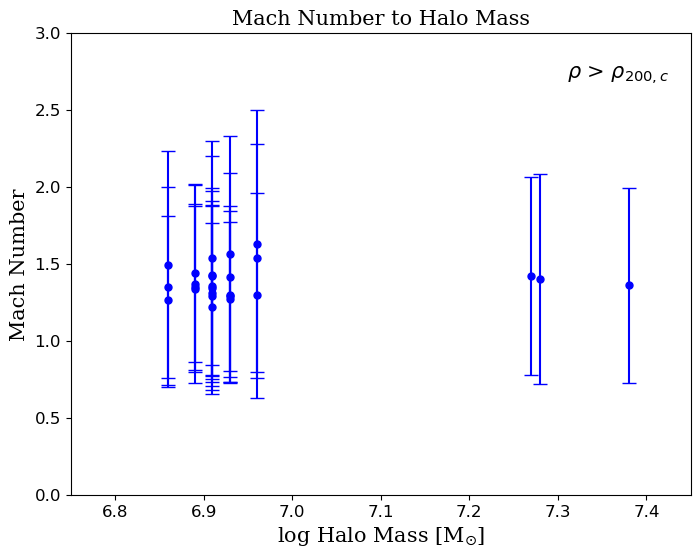

In [37]:
# plot the relation between the DM mass and the mach number

font = {'family': 'serif',
        'weight': 'normal',
        'size': 15,
}

plt.figure(figsize=(8,6))
plt.errorbar(f['DM Mass'].values, mach[:model_num], yerr=mach_std[:model_num], fmt='o', markersize=5, capsize=5, capthick=1, color='blue')

x_lim_min = 6.75
x_lim_max = 7.45
plt.text((x_lim_min*1+x_lim_max*4)/5, 2.7, r"$\rho$ > $\rho_{200,c}$", fontdict=font)
plt.xlabel('log Halo Mass [M$_{\odot}$]', fontdict=font)
plt.ylabel('Mach Number', fontdict=font)
plt.xticks( fontsize=12 )
plt.yticks( fontsize=12 )

plt.title('Mach Number to Halo Mass', fontdict=font)
plt.ylim(0, 3)
plt.xlim(x_lim_min, x_lim_max)

plt.savefig('mach_number.png', dpi=800)

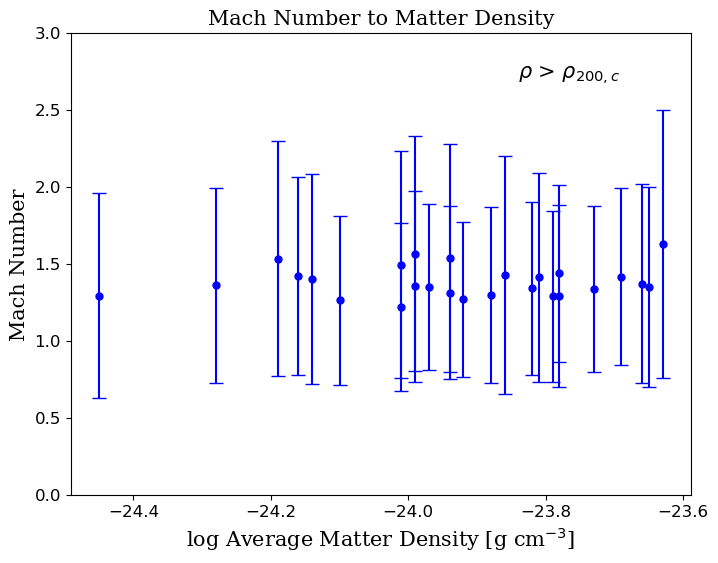

In [38]:
# # plot the relation between the mach number and the average density of the gas

font = {'family': 'serif',
        'weight': 'normal',
        'size': 15,
}

plt.figure(figsize=(8,6))
plt.errorbar(f['Matter Density'].values, mach[:model_num], yerr=mach_std[:model_num], fmt='o', markersize=5, capsize=5, capthick=1, color='blue')

x_lim_min = -24.5
x_lim_max = -23.4
plt.text((x_lim_min*2+x_lim_max*3)/5, 2.7, r"$\rho$ > $\rho_{200,c}$", fontdict=font)
plt.xlabel('log Average Matter Density [g cm$^{-3}$]', fontdict=font)
plt.ylabel('Mach Number', fontdict=font)
plt.xticks( fontsize=12 )
plt.yticks( fontsize=12 )

plt.title('Mach Number to Matter Density', fontdict=font)
plt.ylim(0, 3)

plt.savefig('matter_density.png', dpi=800)

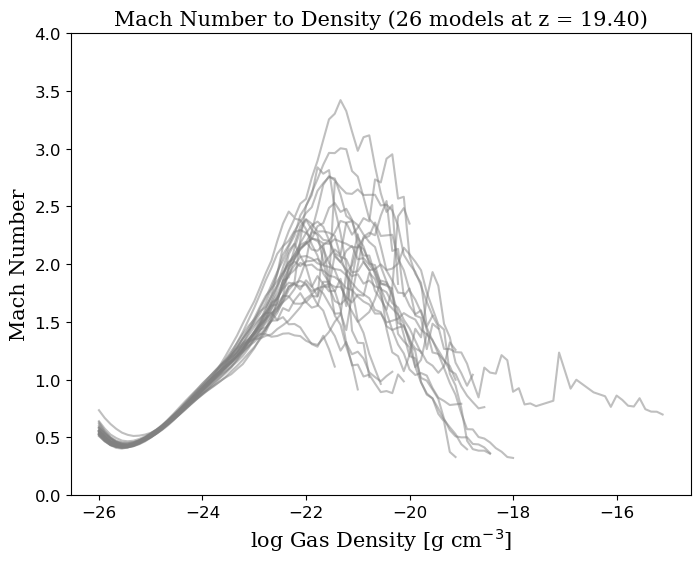

In [39]:
# Record the mach_number curve in every valid model directory

models = [model for model in os.listdir('./') if (model[2] == '_')]
model_num = len(f['ID'])
beams = np.logspace(-23, -13, 100)

density = np.zeros( len(models) )
mach = np.zeros( len(models) )
mach_std = np.zeros( len(models) )

plt.figure(figsize=(8,6))
for dir in models:
    # jump the directory which has been skipped
    if dir[-1] != 'a':
        continue
    dir_output = dir + '/output/mach_number_030_2.txt'
    # record the file's info
    file = open(dir_output, 'r')
    lines = file.readlines()
    file.close()
    
    # find the corresponding ID
    ID = int(dir.split('_')[1][7:])
    idx = np.where(f['ID'] == ID)[0][0]

    # record the mach number
    density = np.zeros( len(lines)-1 )
    mach = np.zeros( len(lines)-1 )
    mach_std = np.zeros( len(lines)-1 )

    for i in range(1, len(lines)):
        line = lines[i].split(',')
        density[i-1] = np.log10(float(line[0]))
        mach[i-1] = float(line[1])
        mach_std[i-1] = float(line[2])
    
    # plot the mach number curve
    # plt.errorbar(density, mach, yerr=mach_std, fmt='o', markersize=5, capsize=5, capthick=1, color='blue')
    # plt.errorbar(density, mach, yerr=mach_std, fmt='o', markersize=1, color='blue')
    plt.plot(density, mach, color='grey', alpha=0.5)

plt.xlabel('log Gas Density [g cm$^{-3}$]', fontdict=font)
plt.ylabel('Mach Number', fontdict=font)
plt.xticks( fontsize=12 )
plt.yticks( fontsize=12 )

plt.title('Mach Number to Density (26 models at z = 19.40)', fontdict=font)
plt.ylim(0, 4)

plt.show()

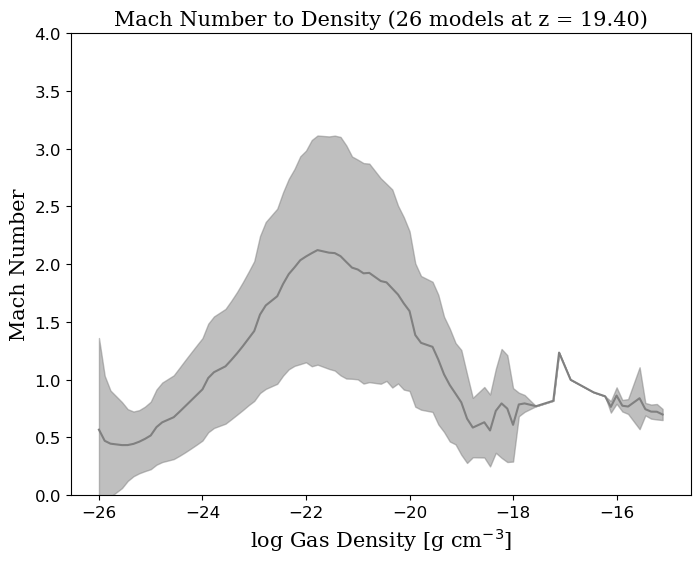

In [40]:
# Record the mach_number curve in every valid model directory
font = {'family': 'serif',
        'weight': 'normal',
        'size': 15,
}

models = [model for model in os.listdir('./') if (model[2] == '_')]
model_num = len(f['ID'])
beams = np.logspace(-26, -15, 100)

# dimension 0: models, dimension1: density beams, dimension2: mach number and mach number std
record = np.zeros( (len(models), len(beams), 2) )

plt.figure(figsize=(8,6))
for dir in models:
    # jump the directory which has been skipped
    if dir[-1] != 'a':
        continue
    dir_output = dir + '/output/mach_number_030_2.txt'
    # record the file's info
    file = open(dir_output, 'r')
    lines = file.readlines()
    file.close()
    
    # find the corresponding ID
    ID = int(dir.split('_')[1][7:])
    idx = np.where(f['ID'] == ID)[0][0]

    for i in range(1, len(lines)):
        line = lines[i].split(',')
        density_i = np.log10(float(line[0]))
        # find the density_i index in the beams
        idx_i = np.where(density_i >= np.log10(beams))[0][-1]

        record[idx, idx_i, 0] = float(line[1])
        record[idx, idx_i, 1] = float(line[2])
    
combined_curve = np.zeros( (len(beams), 2) )
for i in range(len(beams)):
    mach_i = np.zeros( len(models) )
    mach_std_i = np.zeros( len(models) )
    for j in range(len(models)):
        mach_i[j] = record[j, i, 0]
        mach_std_i[j] = record[j, i, 1]

    # calculate only the valid mach number
    index = np.where(mach_i != 0)[0]
    if index.size == 0:
        continue
    mach_i = mach_i[index]
    mach_std_i = mach_std_i[index]
    
    combined_curve[i, 0] = np.mean(mach_i)
    combined_curve[i, 1] = np.sqrt(np.sum(mach_std_i**2 + mach_i**2) / len(index) - np.mean(mach_i)**2)
    # combined_curve[i, 1] = np.std(mach_i)

index = np.where(combined_curve[:,0] != 0)[0]
x = np.log10(beams[index])
y = combined_curve[index,0]

plt.plot(x, y, markersize=1, color='grey')
plt.fill_between(x, y-combined_curve[index,1], y+combined_curve[index,1], alpha=0.5, color='grey')
plt.xlabel('log Gas Density [g cm$^{-3}$]', fontdict=font)
plt.ylabel('Mach Number', fontdict=font)
plt.xticks( fontsize=12 )
plt.yticks( fontsize=12 )

plt.title('Mach Number to Density (26 models at z = 19.40)', fontdict=font)
plt.ylim(0, 4)

plt.show()

In [26]:
# Show the first value in the record
print(beams[0], combined_curve[0,0], combined_curve[0,1])

1e-26 0.5666923076923077 0.7935454651911533


In [27]:
# show the highest mach number
index = np.argmax(combined_curve[:,0])
print(beams[index], combined_curve[index,0], combined_curve[index,1])

1.6681005372000557e-22 2.1214615384615385 0.9919132146734345


In [30]:
# show the local minima between 1e-22 and 1e-18
index = np.where((beams > 5e-23) & (beams < 1e-18) & (combined_curve[:,1] != 0))[0]
minima = np.argmin(combined_curve[index,0])
print(beams[index][minima], combined_curve[index][minima, 0], combined_curve[index][minima, 1])

3.59381366380464e-19 0.55975 0.3113642360644524
